In [3]:
import sys
sys.path.insert(0, '../')
from Models.potts import Potts
from Models.fastIsing import Ising
import networkx as nx, matplotlib.pyplot as plt, numpy as np

n = 32
g = nx.grid_2d_graph(n, n)

m =  Potts(graph = g, agentStates = [0, 1, 2])
# m =  Ising(graph = g)
temps = np.logspace(-2, np.log10(g.number_of_nodes())/2, 20)
mag, sus = m.matchMagnetization(temps)



  0%|          | 0/20 [00:00<?, ?it/s]

Computing mag per t



100%|██████████| 20/20 [00:21<00:00,  6.78s/it]

<IPython.core.display.Javascript object>


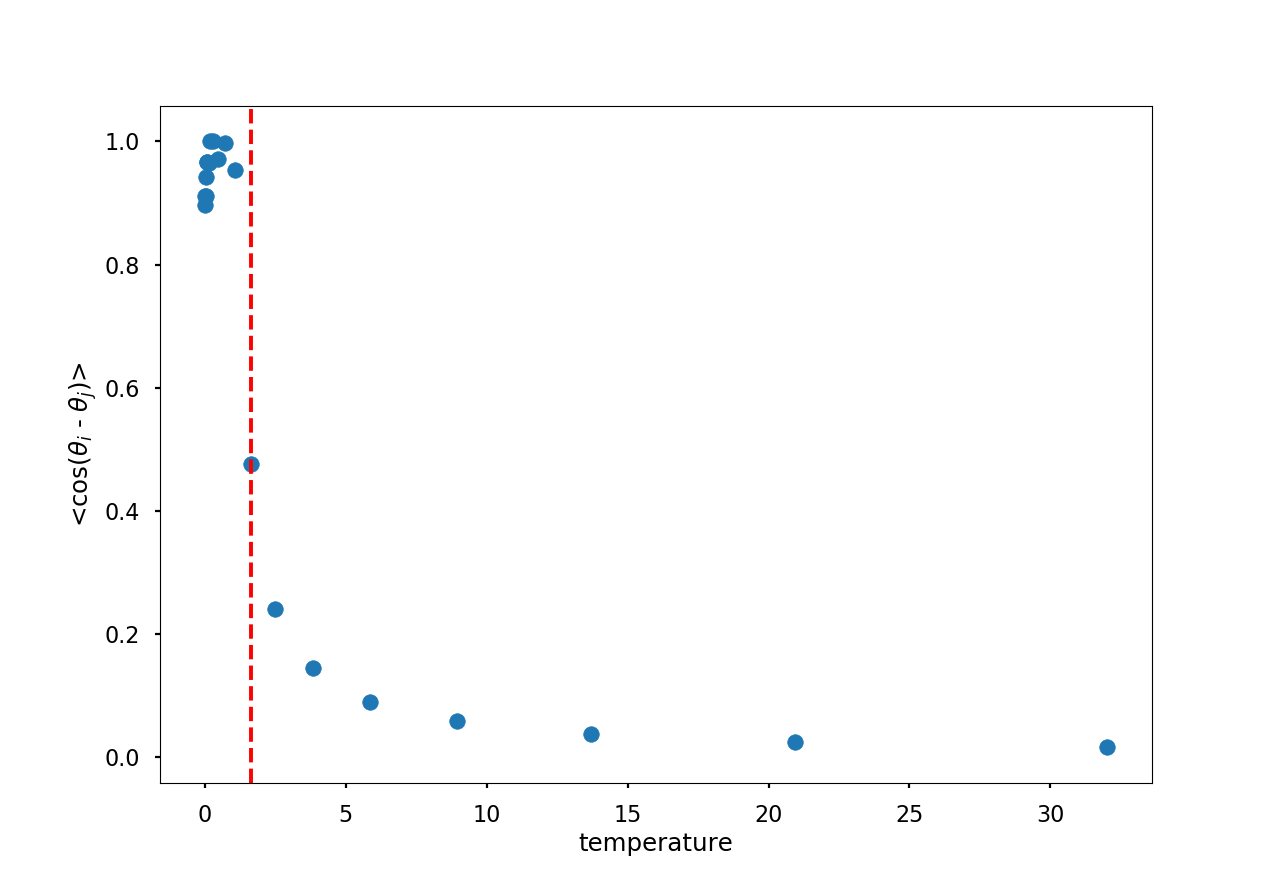

In [6]:
from matplotlib import style; style.use('seaborn-poster')
fig, ax = plt.subplots()
ax.scatter(temps, mag)
ax.set(xlabel = 'temperature', ylabel = r'<cos($\theta_i$ - $\theta_j$)>')
idx = np.argmin(abs(mag - .5 * mag.max()))
ax.axvline(temps[idx], color = 'red', linestyle = 'dashed')
fig.show()

<IPython.core.display.Javascript object>


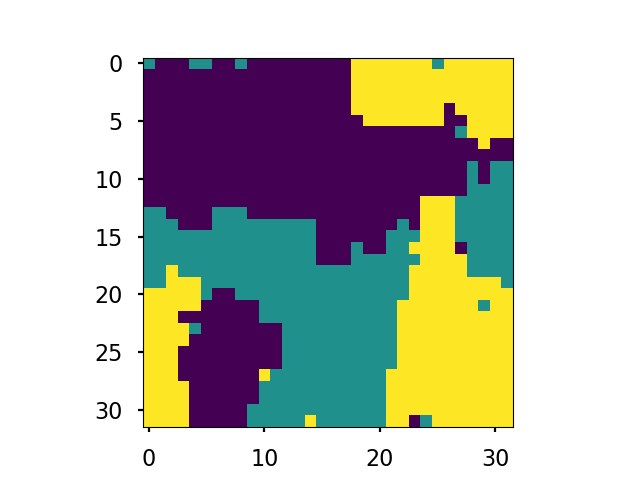

interactive(children=(IntSlider(value=0, description='time', max=99), Output()), _dom_classes=('widget-interac…

In [5]:
%matplotlib notebook
import ipywidgets as ipy
m.reset()
res = m.simulate(100)
fig, ax = plt.subplots()
h = ax.imshow(res[0].reshape(n, n))
fig.show()
@ipy.interact(time = ipy.widgets.IntSlider(min = 0, max = res.shape[0] - 1, value = 0))
def update(time):
    h.set_data(res[time].reshape(n, n))
    fig.canvas.draw(); fig.canvas.flush_events()
